In [2]:
import pandas as pd

df = pd.read_csv('data.csv')

df.head()

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,repeated_plays,timestamp
0,4ZtFanR9U6ndgddUvNcjcG,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563,1,08:00:00
1,5fxyZf6m2xHeSrOzUfcJrq,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564,0,08:00:00
2,5nujrmhLynf4yMoMtj8AQF,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702,1,09:20:00
3,4iJyoBOLtHqaGxP12qzhQI,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677,0,10:20:00
4,1SC5rEoYDGUK4NfG82494W,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593,1,11:20:00


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


/tmp/ipython-input-11-2236497718.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


In [ ]:
df['timestamp'].head()

,timestamp
0,2025-07-01 08:00:00
1,2025-07-01 08:00:00
2,2025-07-01 09:20:00
3,2025-07-01 10:20:00
4,2025-07-01 11:20:00


In [ ]:
df = df.drop(columns=['id'])


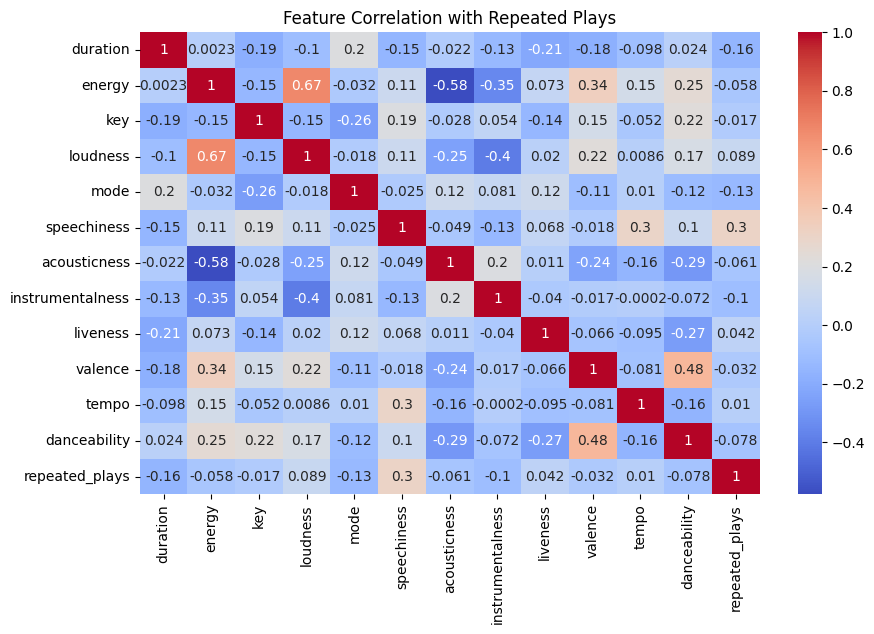

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Repeated Plays")
plt.show()


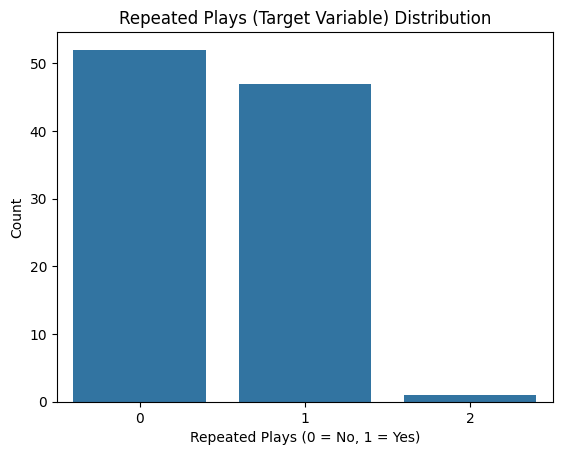

In [ ]:
sns.countplot(x='repeated_plays', data=df)
plt.title("Repeated Plays (Target Variable) Distribution")
plt.xlabel("Repeated Plays (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [ ]:
# Extract hour and day from timestamp
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.dayofweek  # Monday = 0, Sunday = 6


In [ ]:
df = df.drop(columns=['timestamp'])


In [ ]:
# Store 'name' column separately for use during recommendation
song_names = df['name']

# Drop 'name' from training data
X = df.drop(columns=['repeated_plays', 'name'])
y = df['repeated_plays']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6

Confusion Matrix:
[[8 3]
 [5 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



In [ ]:
# Get probability of repeated play (1)
probs = model.predict_proba(X_test)[:, 1]


In [ ]:
# Get song names matching X_test indices
test_song_names = song_names.iloc[X_test.index]

# Create a DataFrame with probabilities and song names
recommendations = pd.DataFrame({
    'song_name': test_song_names.values,
    'replay_probability': probs
})


In [ ]:
top_songs = recommendations.sort_values(by='replay_probability', ascending=False).head(5)
top_songs


,song_name,replay_probability
5,Yonaguni Bad Bunny,0.790000
15,Montero (Call Me By Your Name) Lil Nas X,0.778333
13,Shivers Ed Sheeran,0.700000
4,Talking to the Moon Bruno Mars,0.643333
9,Good 4 U Olivia Rodrigo,0.550000


In [ ]:
import joblib
joblib.dump(model, 'music_model.pkl')


['music_model.pkl']

/tmp/ipython-input-27-3197102271.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='replay_probability', y='song_name', data=top_songs, palette='viridis')
/tmp/ipython-input-27-3197102271.py:16: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


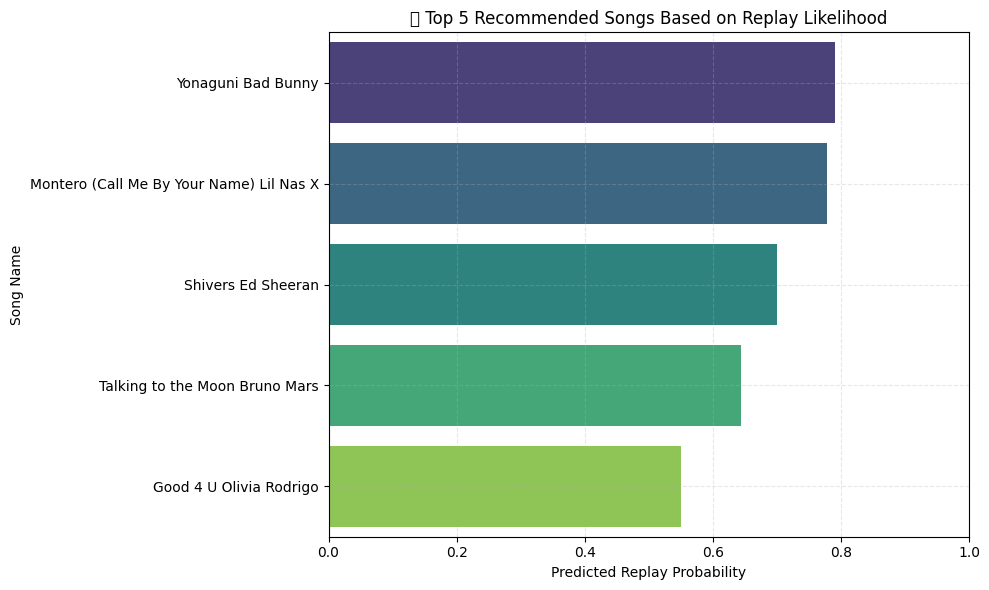

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and get top 5
top_songs = recommendations.sort_values(by='replay_probability', ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='replay_probability', y='song_name', data=top_songs, palette='viridis')

plt.xlabel('Predicted Replay Probability')
plt.ylabel('Song Name')
plt.title('🎧 Top 5 Recommended Songs Based on Replay Likelihood')
plt.xlim(0, 1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
!cp /content/music_model.pkl /content/drive/MyDrive/ProjectColab/MusicRecommendation/


cp: cannot create regular file '/content/drive/MyDrive/ProjectColab/MusicRecommendation/': No such file or directory


In [ ]:
import joblib
joblib.dump(model, '/content/music_model.pkl')


['/content/music_model.pkl']

In [ ]:
from google.colab import files
files.download('/content/music_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>